In [217]:
import pandas as pd
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
df_train_features = pd.read_csv("C:\Users\kaisyuenl\Data science projects\Driven Data competitions\DengAI\dengue_features_train.csv")  #I am working in Windows environment
df_train_labels=pd.read_csv("C:\Users\kaisyuenl\Data science projects\Driven Data competitions\DengAI\dengue_labels_train.csv")

In [218]:
df_train_all=df_train_features.merge(df_train_labels,how='outer',on=['city','year','weekofyear'])

In [219]:
#one-hot encoding for cities
df_train_all=pd.get_dummies(df_train_all,columns=['city'])

#drop week_start_date
df_train_all=df_train_all.drop('week_start_date',axis=1)

In [220]:
X = df_train_all.loc[:, df_train_all.columns != 'total_cases']
y = df_train_all.loc[:, 'total_cases']

In [221]:
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [223]:
param = {
    'max_depth': 6,  # the maximum depth of each tree
    'eta': 0.3,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'reg:linear',
    'eval_metric':'mae'
} 
num_round = 30  # the number of training iterations

In [224]:
bst = xgb.train(param, dtrain, num_round)

In [225]:
bst.dump_model('dump.raw.txt')

In [226]:
preds = bst.predict(dtest)

In [363]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

print mean_absolute_error(y_test, preds)
print mean_squared_error(y_test, preds)

ValueError: Found input variables with inconsistent numbers of samples: [416, 292]

In [230]:
df_train_features = pd.read_csv("C:\Users\kaisyuenl\Data science projects\Driven Data competitions\DengAI\dengue_features_train.csv")  #I am working in Windows environment
df_train_labels=pd.read_csv("C:\Users\kaisyuenl\Data science projects\Driven Data competitions\DengAI\dengue_labels_train.csv")
df_test=pd.read_csv("C:\Users\kaisyuenl\Data science projects\Driven Data competitions\DengAI\dengue_features_test.csv")

In [231]:
#one-hot encoding for cities
df_test=pd.get_dummies(df_test,columns=['city'])

#drop week_start_date
df_test=df_test.drop('week_start_date',axis=1)

In [232]:
df_test["total_cases"] = np.nan


In [233]:
y_sub = df_test.loc[:, 'total_cases']

In [234]:
dsub = xgb.DMatrix(X_sub, label=y_sub)

In [235]:
X_sub = df_test.loc[:, df_test.columns != 'total_cases']

In [236]:
preds = bst.predict(dsub)

In [237]:
type(preds)

numpy.ndarray

In [238]:
preds.shape

(416L,)

In [239]:
preds=preds.T

In [240]:
preds.shape

(416L,)

In [241]:
X_sub.shape

(416, 24)

In [242]:
preds_df=pd.DataFrame(preds.T, columns=['total_cases'])

In [243]:
df_submit=X_sub.join(preds_df)

In [244]:
df_submit.total_cases = df_submit.total_cases.astype(int)

In [245]:
df_submit_drop=df_submit[['year','weekofyear','total_cases','city_iq','city_sj']]

In [248]:
df_submit_drop

,year,weekofyear,total_cases,city_iq,city_sj
0,2008,18,5,0,1
1,2008,19,11,0,1
2,2008,20,5,0,1
3,2008,21,6,0,1
4,2008,22,9,0,1
5,2008,23,10,0,1
6,2008,24,8,0,1
7,2008,25,4,0,1
8,2008,26,21,0,1
9,2008,27,17,0,1


In [264]:
city=df_submit_drop[['city_iq','city_sj']]

In [278]:
df_submit_nocity=df_submit_drop.drop('city_iq',axis=1)

In [279]:
df_submit_nocity=df_submit_nocity.drop('city_sj',axis=1)

In [280]:
df_submit_nocity

,year,weekofyear,total_cases
0,2008,18,5
1,2008,19,11
2,2008,20,5
3,2008,21,6
4,2008,22,9
5,2008,23,10
6,2008,24,8
7,2008,25,4
8,2008,26,21
9,2008,27,17


In [281]:
city

,city_iq,city_sj
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,0,1
6,0,1
7,0,1
8,0,1
9,0,1


In [282]:
from itertools import groupby

def back_from_dummies(df):
    result_series = {}

    # Find dummy columns and build pairs (category, category_value)
    dummmy_tuples = [(col.split("_")[0],col) for col in df.columns if "_" in col]

    # Find non-dummy columns that do not have a _
    non_dummy_cols = [col for col in df.columns if "_" not in col]

    # For each category column group use idxmax to find the value.
    for dummy, cols in groupby(dummmy_tuples, lambda item: item[0]):

        #Select columns for each category
        dummy_df = df[[col[1] for col in cols]]

        # Find max value among columns
        max_columns = dummy_df.idxmax(axis=1)

        # Remove category_ prefix
        result_series[dummy] = max_columns.apply(lambda item: item.split("_")[1])

    # Copy non-dummy columns over.
    for col in non_dummy_cols:
        result_series[col] = df[col]

    # Return dataframe of the resulting series
    return pd.DataFrame(result_series)

In [283]:
city_final=back_from_dummies(city)

In [287]:
df_submit_final=city_final.join(df_submit_nocity)

In [288]:
df_submit_final

,city,year,weekofyear,total_cases
0,sj,2008,18,5
1,sj,2008,19,11
2,sj,2008,20,5
3,sj,2008,21,6
4,sj,2008,22,9
5,sj,2008,23,10
6,sj,2008,24,8
7,sj,2008,25,4
8,sj,2008,26,21
9,sj,2008,27,17


In [297]:
df_submit_final=df_submit_final[['city','year','weekofyear','total_cases']]

In [306]:
df_submit_final.to_csv

<bound method DataFrame.to_csv of     city  year  weekofyear  total_cases
0     sj  2008          18            5
1     sj  2008          19           11
2     sj  2008          20            5
3     sj  2008          21            6
4     sj  2008          22            9
5     sj  2008          23           10
6     sj  2008          24            8
7     sj  2008          25            4
8     sj  2008          26           21
9     sj  2008          27           17
10    sj  2008          28           27
11    sj  2008          29           41
12    sj  2008          30           27
13    sj  2008          31           28
14    sj  2008          32           50
15    sj  2008          33           76
16    sj  2008          34           20
17    sj  2008          35           69
18    sj  2008          36           94
19    sj  2008          37          125
20    sj  2008          38           56
21    sj  2008          39           36
22    sj  2008          40           21
23    

In [312]:
import seaborn as sns
%matplotlib inline

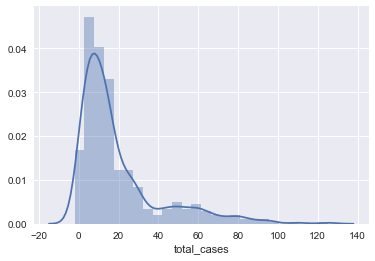

In [314]:
sns.distplot(df_submit_final['total_cases'])

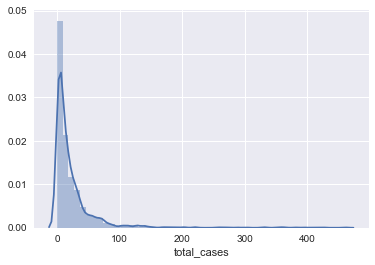

In [316]:
sns.distplot(df_train_all['total_cases'])

In [321]:
sub_format=pd.read_csv("C:\Users\kaisyuenl\Data science projects\Driven Data competitions\DengAI\submission_format.csv")

In [322]:
sub_format=sub_format.drop('total_cases',axis=1)

In [353]:
submission=sub_format.join(preds_df)

In [354]:
import numpy as np
preds_df_inte=submission.total_cases.astype(float).round().astype(int)

In [357]:
preds_df_inte

0        6
1       11
2        5
3        6
4        9
5       11
6        9
7        5
8       22
9       17
10      27
11      42
12      27
13      28
14      50
15      76
16      20
17      69
18      94
19     125
20      56
21      37
22      21
23      60
24      24
25      31
26      30
27      26
28      25
29      29
      ... 
386     11
387      9
388      9
389      3
390     15
391     20
392     16
393     17
394     22
395     21
396     12
397     15
398     22
399     11
400      5
401     10
402      7
403      4
404      4
405      8
406     11
407      3
408      7
409     10
410      3
411     15
412      4
413      3
414      5
415      4
Name: total_cases, Length: 416, dtype: int32

In [358]:
submission=sub_format.join(preds_df_inte)

In [361]:
submission

,city,year,weekofyear,total_cases
0,sj,2008,18,6
1,sj,2008,19,11
2,sj,2008,20,5
3,sj,2008,21,6
4,sj,2008,22,9
5,sj,2008,23,11
6,sj,2008,24,9
7,sj,2008,25,5
8,sj,2008,26,22
9,sj,2008,27,17


In [362]:
submission.to_csv(path_or_buf='submission.csv',index=False)